In [0]:
from fastai.vision import *

## Download images

In [0]:
#https://www.christianwerner.net/tech/Build-your-image-dataset-faster/#
!pip install git+https://github.com/cwerner/fastclass.git#egg=fastclass

  Cloning https://github.com/cwerner/fastclass.git to /tmp/pip-install-qm7ef79m/fastclass
  Stored in directory: /tmp/pip-ephem-wheel-cache-eg9969vt/wheels/85/6e/d5/52ccfe3ffa172e009d525d12dd3e6d187e896272b538703cbf
Successfully built fastclass


In [0]:
cd /content/tiger/

/content/tiger


In [0]:
rm -r sear*

In [0]:
!fcd -c BING -k -o tiger tigers.csv 

INFO: final dataset will be located i tiger
Searching: >> searchterm <<
(1) Crawling ...
    -> BING
Number of duplicate image files: 1. Removing...
(2) Resizing images to (299, 299)
100% 343/343 [00:06<00:00, 56.53it/s]
Searching: >> """Tiger Sumatran""" <<
(1) Crawling ...
    -> BING
Number of duplicate image files: 1. Removing...
(2) Resizing images to (299, 299)
100% 566/566 [00:15<00:00, 40.39it/s]
Searching: >> """Tiger Siberian""" <<
(1) Crawling ...
    -> BING
Number of duplicate image files: 1. Removing...
(2) Resizing images to (299, 299)
100% 471/471 [00:13<00:00, 34.98it/s]
Searching: >> """Tiger Bengal""" <<
(1) Crawling ...
    -> BING
Number of duplicate image files: 1. Removing...
(2) Resizing images to (299, 299)
100% 543/543 [00:14<00:00, 38.37it/s]
Searching: >> """Tiger South China""" <<
(1) Crawling ...
    -> BING

Aborted!


In [0]:
#create a zip file:

!zip -r /content/tiger.zip /content/tiger
#Than downlod that zip file:

from google.colab import files
files.download("/content/tiger.zip")

In [0]:
classes = ['Sumatran_tigris','Siberian_tigris','Bengal_tigris','South_China_tigris','Malayan_tigris','Indochinese_tigris','Bali_tigris']

In [0]:
path = Path('/content/tiger/')

In [0]:
path.ls()

[PosixPath('/content/tiger/Siberian_tigris.log'),
 PosixPath('/content/tiger/South_China_tigris.log'),
 PosixPath('/content/tiger/searchterm.log'),
 PosixPath('/content/tiger/Sumatran_tigris'),
 PosixPath('/content/tiger/Siberian_tigris'),
 PosixPath('/content/tiger/Bali_tigris.log'),
 PosixPath('/content/tiger/Indochinese_tigris'),
 PosixPath('/content/tiger/Indochinese_tigris.log'),
 PosixPath('/content/tiger/Malayan_tigris'),
 PosixPath('/content/tiger/Bali_tigris'),
 PosixPath('/content/tiger/Bengal_tigris'),
 PosixPath('/content/tiger/Bengal_tigris.log'),
 PosixPath('/content/tiger/South_China_tigris'),
 PosixPath('/content/tiger/Sumatran_tigris.log'),
 PosixPath('/content/tiger/searchterm'),
 PosixPath('/content/tiger/Malayan_tigris.log')]

In [0]:
#rm -r /content/animal/camel]
rm -r /content/tiger/search*

Then we can remove any images that can't be opened:

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Sumatran_tigris


Siberian_tigris


Bengal_tigris


South_China_tigris


Malayan_tigris


Indochinese_tigris


Bali_tigris


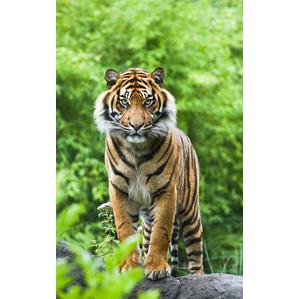

In [0]:
from IPython.display import Image
Image('/content/tiger/Bengal_tigris/000005.jpg')

In [0]:
path

PosixPath('/content/tiger')

## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(".", folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data

ImageDataBunch;

Train: LabelList (4452 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sumatran_tigris,Sumatran_tigris,Sumatran_tigris,Sumatran_tigris,Sumatran_tigris
Path: /content/tiger;

Valid: LabelList (1113 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sumatran_tigris,Bengal_tigris,Malayan_tigris,Malayan_tigris,Bali_tigris
Path: /content/tiger;

Test: None

Good! Let's take a look at some of our pictures then.

In [0]:
data.classes

['Bali_tigris',
 'Bengal_tigris',
 'Indochinese_tigris',
 'Malayan_tigris',
 'Siberian_tigris',
 'South_China_tigris',
 'Sumatran_tigris']

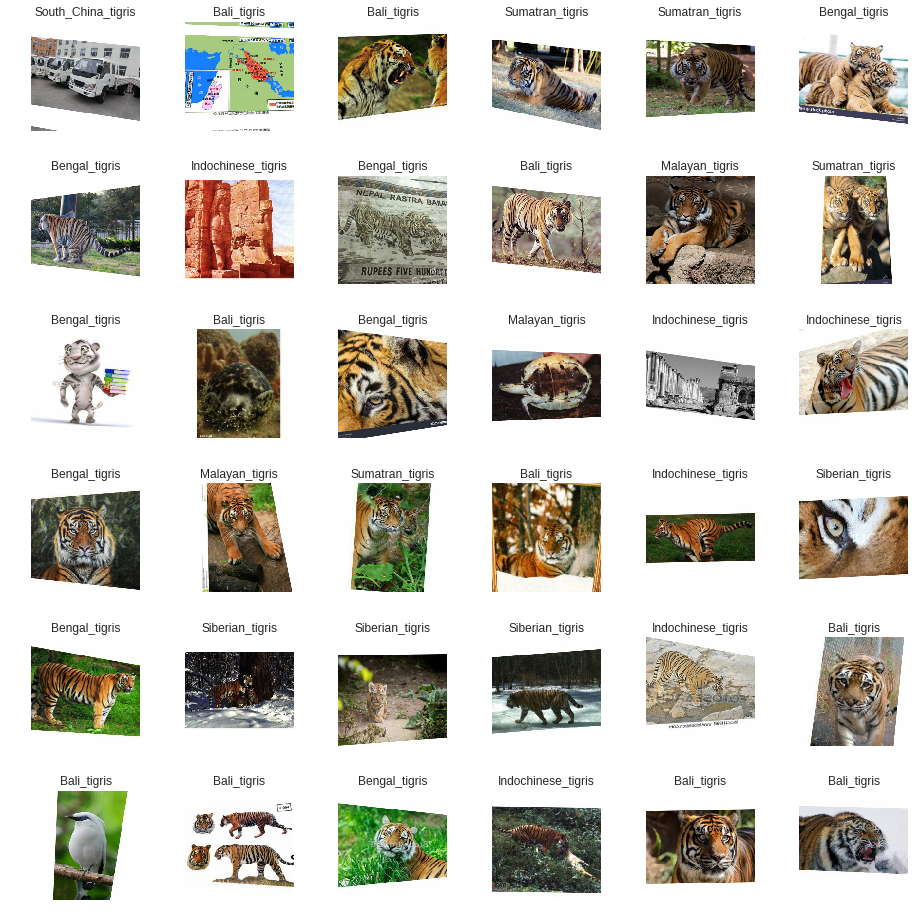

In [0]:
data.show_batch(rows=6, figsize=(13,13))

In [0]:
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
PROJ = "My Drive/DATA" # This is a custom path.
PROJECT_PATH = join(ROOT, PROJ)
!mkdir "{PROJECT_PATH}"
!pip install git+https://github.com/cwerner/fastclass.git#egg=fastclass

mkdir: cannot create directory ‘/content/drive/My Drive/DATA’: File exists


In [0]:
!fcc /content/tiger/Bali_tigris

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Bali_tigris',
  'Bengal_tigris',
  'Indochinese_tigris',
  'Malayan_tigris',
  'Siberian_tigris',
  'South_China_tigris',
  'Sumatran_tigris'],
 7,
 4452,
 1113)

## Train model

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:03, 28022385.93it/s]


In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate
1,2.063158,1.678381,0.609164
2,1.728000,1.598677,0.575921


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07


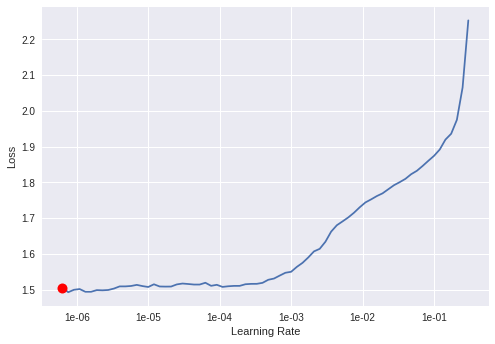

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(6, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate
1,1.669173,2.052511,0.691824
2,1.719440,1.770086,0.662174
3,1.620662,1.573247,0.574124
4,1.468147,1.823217,0.656783
5,1.262039,1.449989,0.524708
6,1.010544,1.424900,0.493261


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

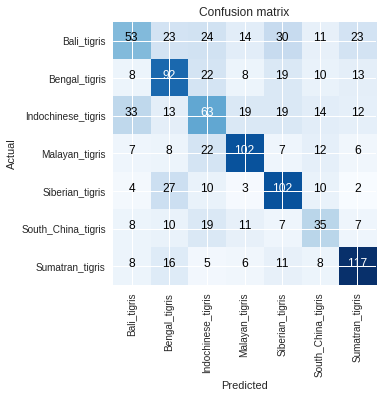

In [0]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]


In [0]:
fd = FileDeleter(file_paths=top_loss_paths)

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [0]:
from fastai.widgets import *

In [0]:
pwd

'/content'

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
ImageCleaner(ds, idxs, path)

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv(path/'cleaned.csv', header='infer')

In [0]:
np.random.seed(42)
db = (ImageItemList.from_df(df, path)
                   .no_split()
                   .label_from_df()
                   .databunch(bs=64))

In [0]:
learn = create_cnn(db, models.resnet34, metrics=error_rate)
learn = learn.load('stage-2')

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [0]:
ImageCleaner(ds, idxs, path, duplicates=True)

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [0]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [0]:
defaults.device = torch.device('cpu')

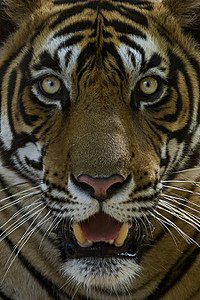

In [0]:
img = open_image('/200px-Tiger_facial_marking_Sultan_(T72)_Ranthambhore_India_12.10.2014.jpg')
img

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Malayan_tigris